# Advanced NLP

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
#nltk.download('punkt') # download the punkt tokenizer if needed
#nltk.download('stopwords') # download the stopwords data if needed

from nltk.corpus import stopwords
import re

import spacy


In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
train_df = pd.read_csv('/Users/stratospheric/Documents/NLP/nlp-getting-started/train.csv')
test_df = pd.read_csv('/Users/stratospheric/Documents/NLP/nlp-getting-started/test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
example = train_df['text']
example

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [40]:
#Remove non-alphabetic characters 
text = []
for line in example : 
    #example = str(example)
    processed_text = re.sub(r'[^a-zA-Z\s]', '', line).lower()
    text.append(processed_text)


print(text[0:5])
print(len(text))

['our deeds are the reason of this earthquake may allah forgive us all', 'forest fire near la ronge sask canada', 'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected', ' people receive wildfires evacuation orders in california ', 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school ']
7613


In [6]:
#convert a list of tokens into a string
text2 = ' '.join(text)
len(text2)

706934

In [7]:
#Lower case the text
text2 = text2.lower()

## Tokenization using NLTK

In [81]:
tokens = nltk.word_tokenize(text2)

print(tokens[0:5])

['our', 'deeds', 'are', 'the', 'reason']


In [8]:
stop_words = set(stopwords.words('english'))

In [89]:
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

filtered_tokens[0:30]

['deeds',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 'canada',
 'residents',
 'asked',
 'shelter',
 'place',
 'notified',
 'officers',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected',
 'people',
 'receive',
 'wildfires',
 'evacuation',
 'orders']

## Tokenization using SpaCy

In [8]:
from spacy.lang.en.stop_words import STOP_WORDS

In [9]:
doc = nlp(text2)

In [11]:
lemmatized_tokens = [token.lemma_ for token in doc]

In [12]:
tokens_without_stop_words = [token for token in lemmatized_tokens if token.lower() not in STOP_WORDS]
print(tokens_without_stop_words[0:30])

['deed', 'reason', 'earthquake', 'allah', 'forgive', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'resident', 'ask', 'shelter', 'place', 'notify', 'officer', 'evacuation', 'shelter', 'place', 'order', 'expect', ' ', 'people', 'receive', 'wildfire', 'evacuation', 'order', 'california']


In [13]:
len(tokens_without_stop_words)

72963

## Word Frequency

In [109]:
### wordcloud

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

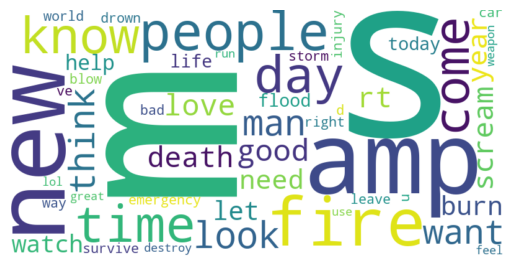

In [15]:

cloud_text = ' '.join(tokens_without_stop_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=50).generate(cloud_text)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [16]:
from collections import Counter


In [ ]:
tokens = [token.strip() for token in tokens_without_stop_words]

print(tokens[0:30])
print(len(tokens))

['deed', 'reason', 'earthquake', 'allah', 'forgive', 'forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada', 'resident', 'ask', 'shelter', 'place', 'notify', 'officer', 'evacuation', 'shelter', 'place', 'order', 'expect', '', 'people', 'receive', 'wildfire', 'evacuation', 'order', 'california']
72963


Let's remove 'm', 's' and empty token.

In [18]:

# Create a new list to store the filtered tokens
filtered_tokens = []

# Iterate over the tokens and filter out empty and unwanted tokens
for token in tokens:
    if token != '' and token not in ['m', 's']:
        filtered_tokens.append(token)

print(len(filtered_tokens))


67420


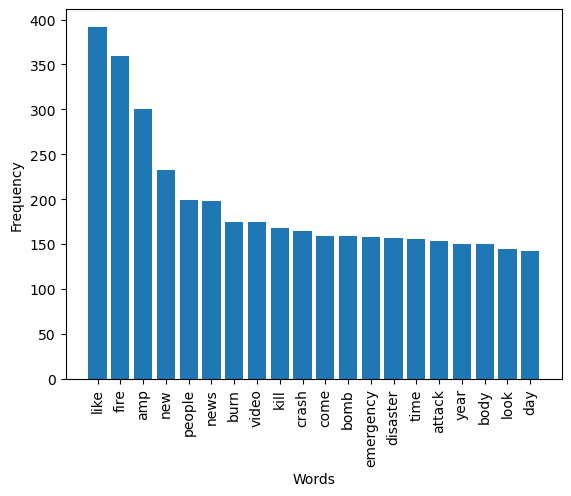

In [19]:
word_count = Counter(filtered_tokens)

# Sort the results
sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

# Plot the top 20 most frequent words
top_words = dict(sorted_words[:20])
plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()), rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

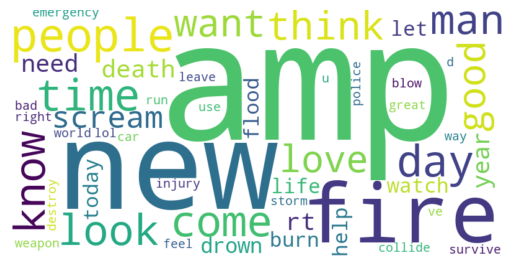

In [20]:
cloud_text = ' '.join(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=50).generate(cloud_text)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text length analysis

In [21]:
len_line = []
for line in text :
    count = len(line)
    len_line.append(count)

print(len_line[0:5])


[68, 37, 130, 58, 86]


In [22]:
import numpy as np
len_line = np.asarray(len_line)
print("Average length :",len_line.mean().round())

Average length : 92.0


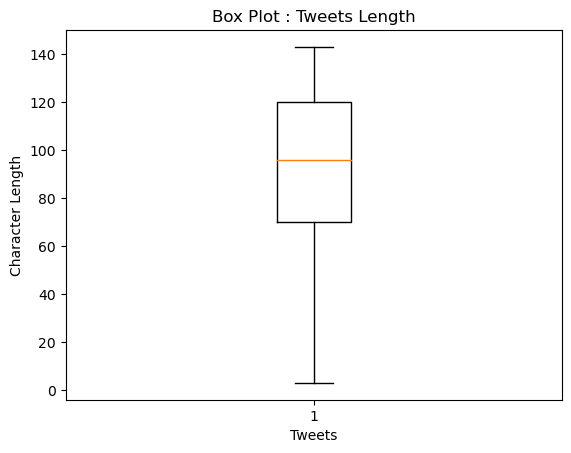

In [23]:
fig, ax = plt.subplots()
ax.boxplot(len_line)

# Add labels and a title
ax.set_xlabel('Tweets')
ax.set_ylabel('Character Length')
ax.set_title('Box Plot : Tweets Length')

# Display the plot
plt.show()

In [24]:
## Data Modeling

In [34]:
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel


# Preprocess the tokens
preprocessed_tokens = simple_preprocess(" ".join(filtered_tokens))

# Create a dictionary from the preprocessed tokens
dictionary = Dictionary([preprocessed_tokens])

# Convert the preprocessed tokens to a bag-of-words representation
bow = dictionary.doc2bow(preprocessed_tokens)

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in [preprocessed_tokens]]

# Build the LDA model
lda_model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=42)

# Print the top words for each topic
for topic in lda_model.print_topics(num_topics=10, num_words=10):
    print(topic)


(0, '0.006*"like" + 0.004*"fire" + 0.003*"new" + 0.003*"people" + 0.003*"amp" + 0.003*"news" + 0.002*"emergency" + 0.002*"crash" + 0.002*"building" + 0.002*"look"')
(1, '0.004*"amp" + 0.004*"fire" + 0.003*"like" + 0.003*"new" + 0.002*"body" + 0.002*"people" + 0.002*"video" + 0.002*"flood" + 0.002*"news" + 0.002*"burn"')
(2, '0.005*"like" + 0.004*"fire" + 0.004*"amp" + 0.003*"new" + 0.003*"news" + 0.003*"people" + 0.002*"year" + 0.002*"bomb" + 0.002*"day" + 0.002*"burn"')
(3, '0.005*"fire" + 0.005*"like" + 0.004*"amp" + 0.003*"new" + 0.002*"come" + 0.002*"kill" + 0.002*"body" + 0.002*"burn" + 0.002*"attack" + 0.002*"time"')
(4, '0.007*"like" + 0.005*"amp" + 0.005*"fire" + 0.003*"people" + 0.003*"emergency" + 0.002*"video" + 0.002*"disaster" + 0.002*"time" + 0.002*"burn" + 0.002*"love"')
(5, '0.005*"like" + 0.004*"fire" + 0.003*"amp" + 0.003*"burn" + 0.003*"crash" + 0.003*"new" + 0.002*"emergency" + 0.002*"bomb" + 0.002*"body" + 0.002*"news"')
(6, '0.004*"fire" + 0.004*"like" + 0.004*"am

In [27]:
filtered_tokens[0:5]

['deed', 'reason', 'earthquake', 'allah', 'forgive']

In [ ]:
!pip install pyLDAvis


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)


In [37]:
pyLDAvis.save_html(vis, 'lda.html')
